# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date      
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | loch garman
Processing Record 2 of Set 1 | hadibu
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | alotau
City not found. Skipping...
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | itaituba
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | katsuura
Processing Record 11 of Set 1 | pagar alam
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | jutai
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | tangalle
Processing Record 18 of Set 1 | fort mcmurray
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | chambas
Processing Record 21 of Set 1 | kapa'a
Processing Re

Processing Record 35 of Set 4 | las heras
Processing Record 36 of Set 4 | es castell
Processing Record 37 of Set 4 | toliara
Processing Record 38 of Set 4 | yarmouth
Processing Record 39 of Set 4 | lorengau
Processing Record 40 of Set 4 | nishinoomote
Processing Record 41 of Set 4 | sarh
Processing Record 42 of Set 4 | caluula
Processing Record 43 of Set 4 | boguchany
Processing Record 44 of Set 4 | petropavlovsk-kamchatsky
Processing Record 45 of Set 4 | sibirskiy
Processing Record 46 of Set 4 | nikolayevsk-on-amure
Processing Record 47 of Set 4 | olney
Processing Record 48 of Set 4 | khandyga
Processing Record 49 of Set 4 | invercargill
Processing Record 0 of Set 5 | puerto lempira
Processing Record 1 of Set 5 | ust-nera
Processing Record 2 of Set 5 | callao
Processing Record 3 of Set 5 | aasiaat
Processing Record 4 of Set 5 | kingscliff
Processing Record 5 of Set 5 | prado
Processing Record 6 of Set 5 | kirakira
Processing Record 7 of Set 5 | gadzhiyevo
Processing Record 8 of Set 5 

Processing Record 25 of Set 8 | aykhal
Processing Record 26 of Set 8 | ayame
Processing Record 27 of Set 8 | pacific grove
Processing Record 28 of Set 8 | zhangjiakou
Processing Record 29 of Set 8 | romanovo
Processing Record 30 of Set 8 | nong kung si
Processing Record 31 of Set 8 | wadesboro
Processing Record 32 of Set 8 | buala
Processing Record 33 of Set 8 | lamar
Processing Record 34 of Set 8 | saint-joseph
Processing Record 35 of Set 8 | we
City not found. Skipping...
Processing Record 36 of Set 8 | ouesso
Processing Record 37 of Set 8 | sieradz
Processing Record 38 of Set 8 | ormara
Processing Record 39 of Set 8 | zhalantun
Processing Record 40 of Set 8 | isangel
Processing Record 41 of Set 8 | richards bay
Processing Record 42 of Set 8 | mil'kovo
Processing Record 43 of Set 8 | nar'yan-mar
Processing Record 44 of Set 8 | bubaque
Processing Record 45 of Set 8 | geneseo
Processing Record 46 of Set 8 | oltinko'l
Processing Record 47 of Set 8 | quelimane
Processing Record 48 of Set

Processing Record 15 of Set 12 | azangaro
Processing Record 16 of Set 12 | slave lake
Processing Record 17 of Set 12 | taro
Processing Record 18 of Set 12 | merced
Processing Record 19 of Set 12 | riyadh
Processing Record 20 of Set 12 | singkawang
Processing Record 21 of Set 12 | lewistown
Processing Record 22 of Set 12 | sanctuary point
Processing Record 23 of Set 12 | cannonvale
Processing Record 24 of Set 12 | antsiranana
Processing Record 25 of Set 12 | fukuecho
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,loch garman,52.3342,-6.4575,16.61,100,94,5.36,IE,1691705787
1,hadibu,12.6500,54.0333,25.52,82,45,6.78,YE,1691705771
2,edinburgh of the seven seas,-37.0676,-12.3116,11.93,72,42,12.32,SH,1691705787
3,ushuaia,-54.8000,-68.3000,2.81,81,75,2.57,AR,1691705788
4,port-aux-francais,-49.3500,70.2167,4.19,80,100,15.67,TF,1691705726


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,loch garman,52.3342,-6.4575,16.61,100,94,5.36,IE,1691705787
1,hadibu,12.6500,54.0333,25.52,82,45,6.78,YE,1691705771
2,edinburgh of the seven seas,-37.0676,-12.3116,11.93,72,42,12.32,SH,1691705787
3,ushuaia,-54.8000,-68.3000,2.81,81,75,2.57,AR,1691705788
4,port-aux-francais,-49.3500,70.2167,4.19,80,100,15.67,TF,1691705726


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

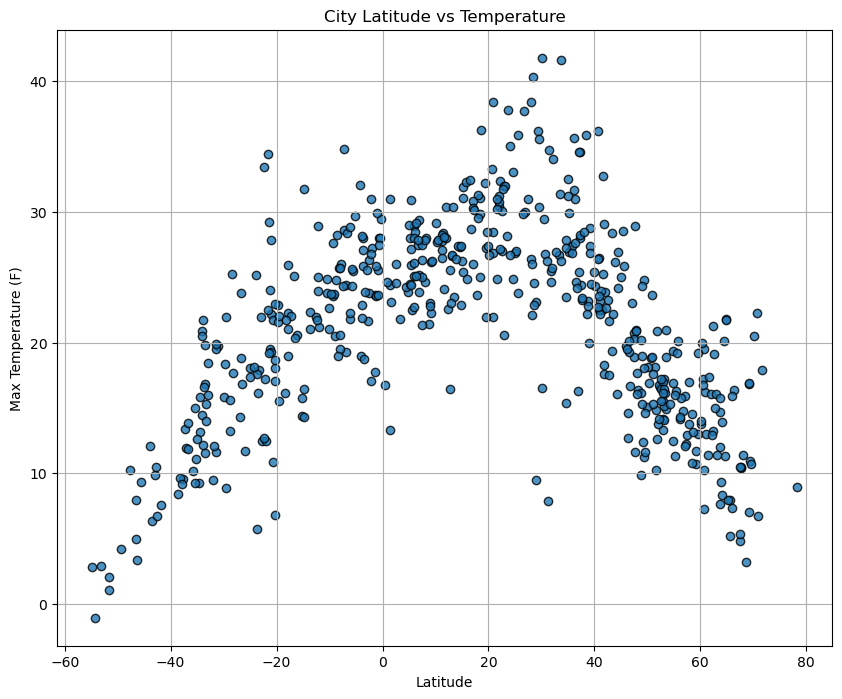

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs Temperature")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

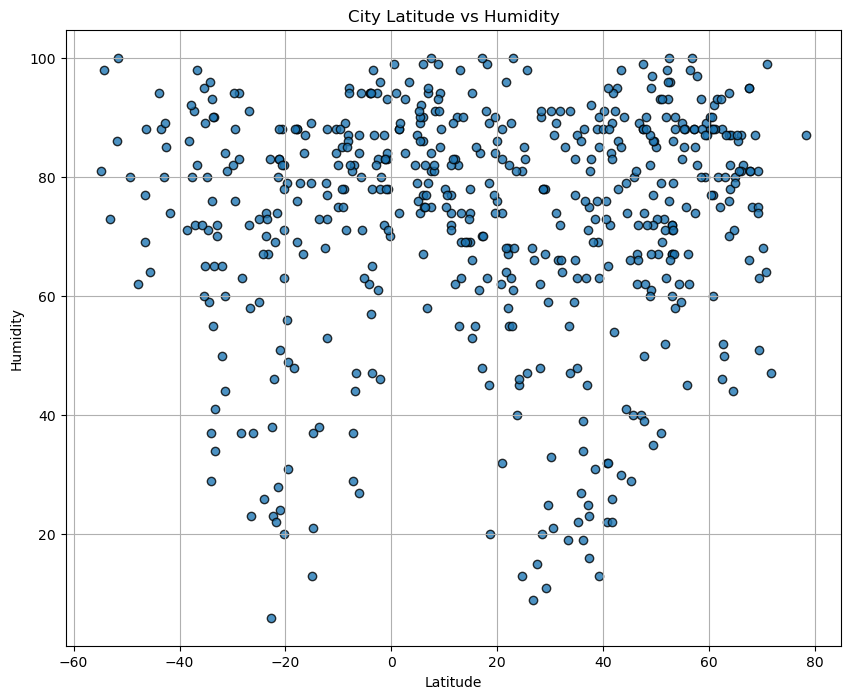

<Figure size 640x480 with 0 Axes>

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity')
plt.grid()
plt.show()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

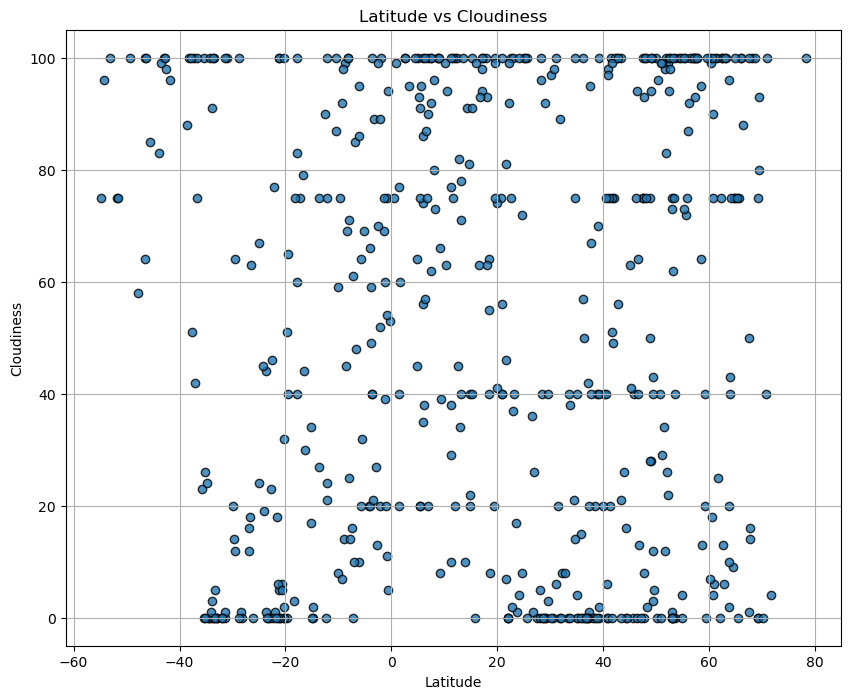

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Latitude vs Cloudiness')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

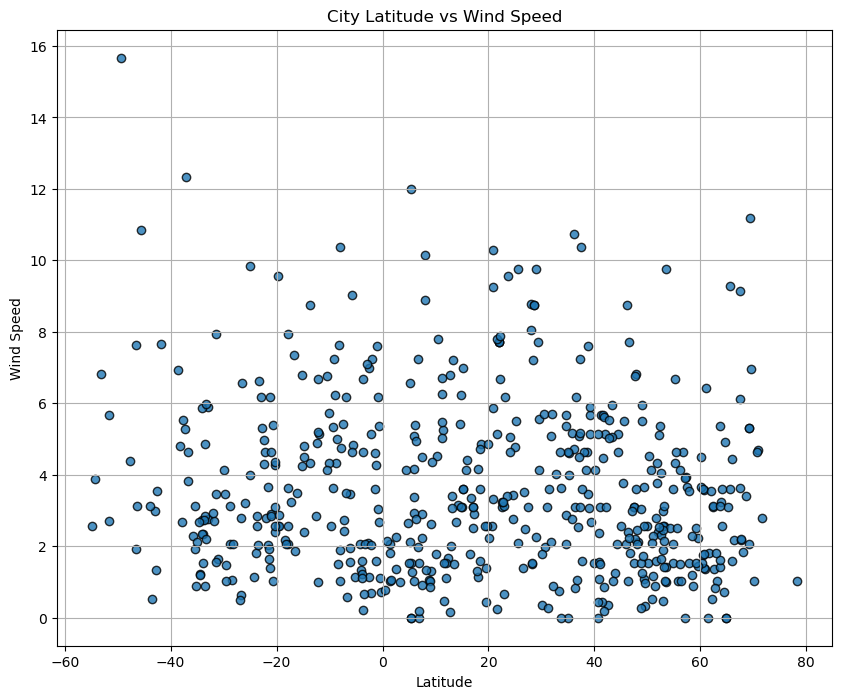

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'City Latitude vs Wind Speed')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lineregress(x,y):
    slope, intercept, rvalue, p_value, std_err =linregress(x, y)   
    plt.plot(x, [intercept + slope*val for val in x], 'r')
    print(f"The R-squared is: {rvalue}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,loch garman,52.3342,-6.4575,16.61,100,94,5.36,IE,1691705787
1,hadibu,12.6500,54.0333,25.52,82,45,6.78,YE,1691705771
8,katsuura,35.1333,140.3000,26.91,87,4,4.61,JP,1691705788
10,georgetown,5.4112,100.3354,27.19,89,20,0.00,MY,1691705499
14,wailua homesteads,22.0669,-159.3780,30.44,68,0,7.72,US,1691705788


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,edinburgh of the seven seas,-37.0676,-12.3116,11.93,72,42,12.32,SH,1691705787
3,ushuaia,-54.8000,-68.3000,2.81,81,75,2.57,AR,1691705788
4,port-aux-francais,-49.3500,70.2167,4.19,80,100,15.67,TF,1691705726
5,itaituba,-4.2761,-55.9836,32.09,62,20,2.06,BR,1691705706
6,puerto natales,-51.7236,-72.4875,1.08,86,75,2.72,CL,1691705530


###  Temperature vs. Latitude Linear Regression Plot

The R-squared is: -0.6753832130161717


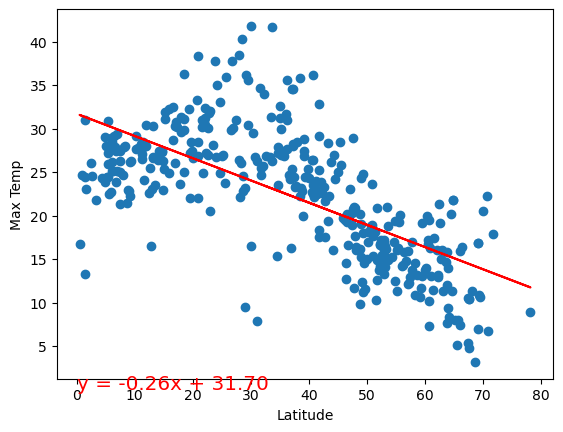

In [15]:
# Linear regression on Northern Hemisphere
lineregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
slope, intercept, rvalue, p_value, std_err =linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(0, 0, s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.savefig("north_max_temp.png")

The R-squared is: 0.7982494484710063


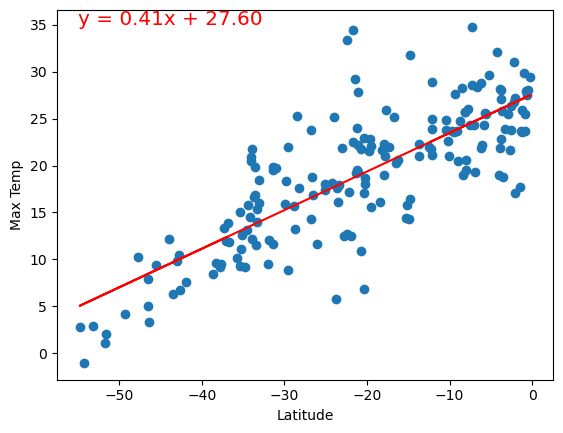

In [16]:
# Linear regression on Southern Hemisphere
lineregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
slope, intercept, rvalue, p_value, std_err =linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(-55,35,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.savefig("south_max_temp.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The R-squared is: -0.007295351837989939


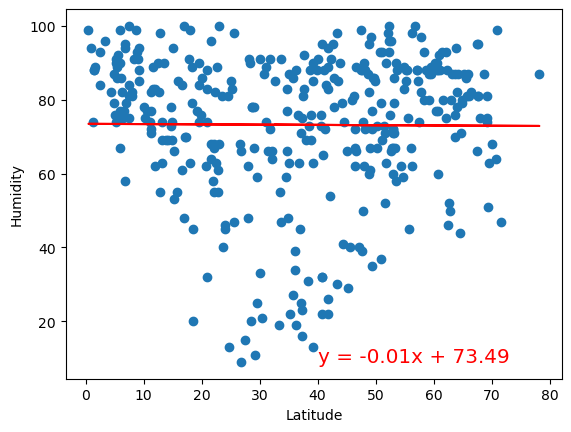

In [17]:
# Northern Hemisphere
lineregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
slope, intercept, rvalue, p_value, std_err =linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(40,9,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("north_humidity.png")

The R-squared is: -0.008881466755858129


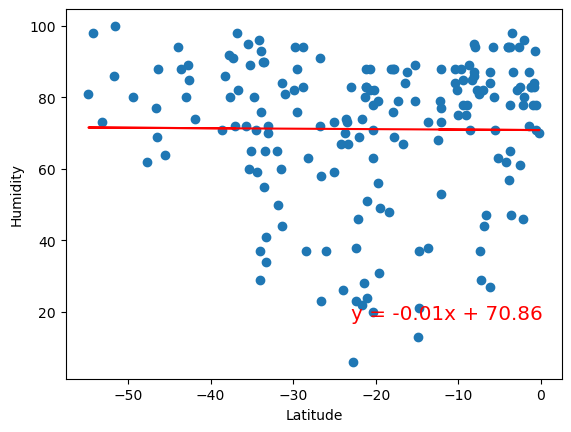

In [18]:
# Southern Hemisphere
lineregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
slope, intercept, rvalue, p_value, std_err =linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(-23,18,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("south_humidity.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The R-squared is: -0.07504322616587294


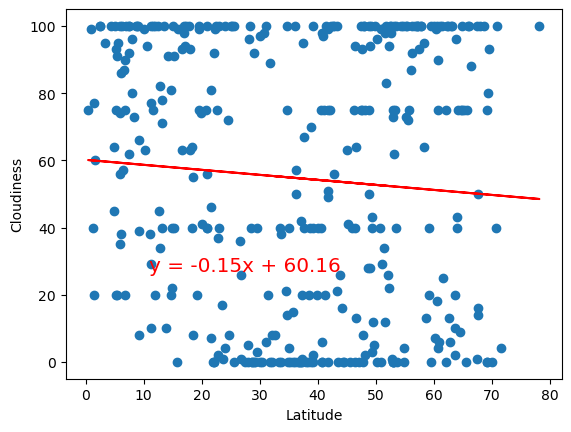

In [19]:
# Northern Hemisphere
lineregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
slope, intercept, rvalue, p_value, std_err =linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(11,27,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("north_cloudiness.png")

The R-squared is: -0.08548888042765453


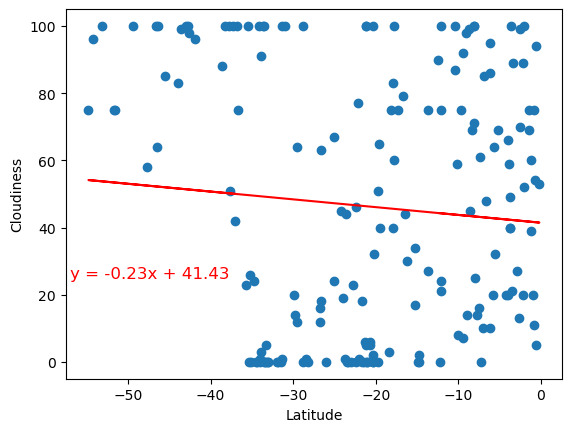

In [20]:
# Southern Hemisphere
lineregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
slope, intercept, rvalue, p_value, std_err =linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(-57,25,s=f"y = {slope}x + {intercept}", c='r', size='large')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("south_cloudiness.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The R-squared is: -0.08177956913888404


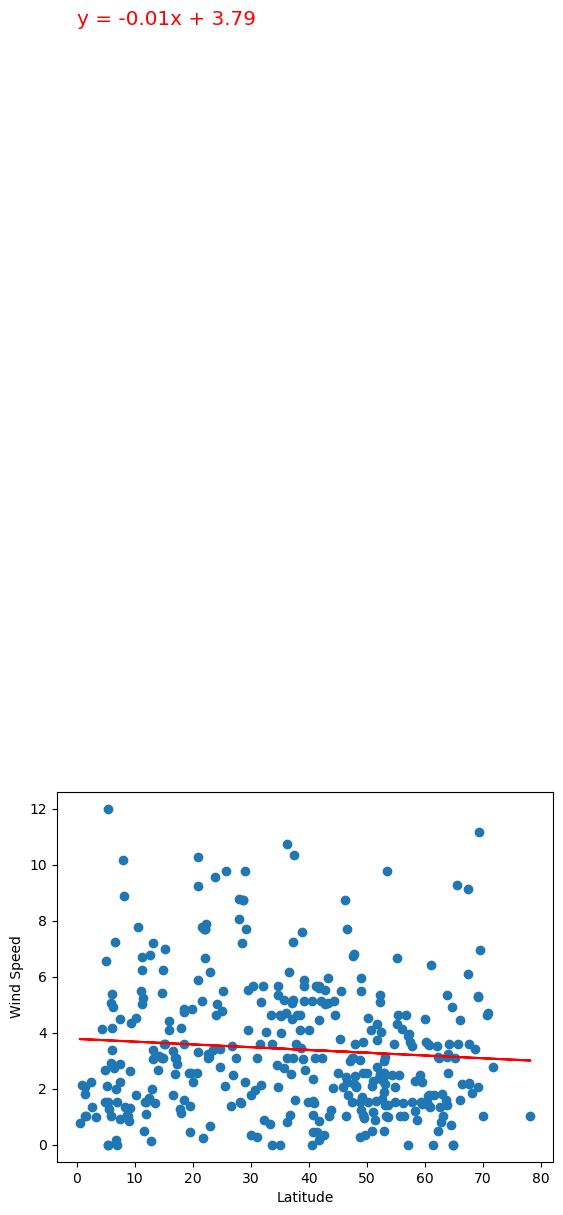

In [21]:
# Northern Hemisphere
lineregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
slope, intercept, rvalue, p_value, std_err =linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(0,40,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("north_wind_speed.png")

The R-squared is: -0.0605742602884226


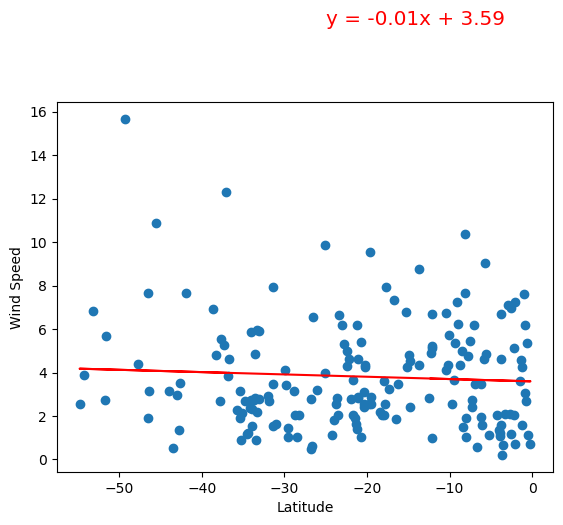

In [22]:
# Southern Hemisphere
lineregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
slope, intercept, rvalue, p_value, std_err =linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(-25,20,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("south_wind_speed.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE